In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
usa_data = pd.read_csv('USATop50.csv',encoding='latin1') 
print(usa_data)

    rank                                              title  \
0      1                                            The Box   
1      2                                       Dance Monkey   
2      3                                             Say So   
3      4                                            ROXANNE   
4      5  death bed (coffee for your head) (feat. beabad...   
5      6                                            Circles   
6      7                                        Sunday Best   
7      8                         Life Is Good (feat. Drake)   
8      9                        Godzilla (feat. Juice WRLD)   
9     10                                everything i wanted   
10    11                                  Someone You Loved   
11    12                                            Safaera   
12    13                                         Supalonely   
13    14                           Intentions (feat. Quavo)   
14    15                       High Fashion (feat. Must

In [3]:
world_data = pd.read_csv('WorldTop50.csv',encoding='latin1') 
print(world_data)

    rank                                              title  \
0      1                                            The Box   
1      2                                       Dance Monkey   
2      3                                             Say So   
3      4                                               Tusa   
4      5                                            ROXANNE   
5      6  death bed (coffee for your head) (feat. beabad...   
6      7                                            Circles   
7      8                                        Sunday Best   
8      9                                        La DifÃ­cil   
9     10                                           Memories   
10    11                        Godzilla (feat. Juice WRLD)   
11    12                                everything i wanted   
12    13                         Life Is Good (feat. Drake)   
13    14                                            Safaera   
14    15                                  Someone You L

In [4]:
usa_numeric = usa_data.select_dtypes(include=[np.number])
world_numeric = world_data.select_dtypes(include=[np.number])

In [5]:
usa_numeric.corr()
world_numeric.corr()

,rank,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
rank,1.000000,0.528084,0.102789,0.224688,-0.161169,0.172793,-0.120767,-0.088380,-0.135080,-0.422387,-0.158345,-0.959267
year,0.528084,1.000000,0.345499,0.370100,-0.027872,0.147555,0.025909,0.007414,-0.079365,-0.433669,0.186286,-0.495507
bpm,0.102789,0.345499,1.000000,0.060084,-0.253213,-0.136537,0.014949,0.089538,-0.253362,-0.162441,0.297068,-0.084271
nrgy,0.224688,0.370100,0.060084,1.000000,-0.082854,0.693191,-0.086815,0.401777,-0.060932,-0.705486,0.165096,-0.180854
dnce,-0.161169,-0.027872,-0.253213,-0.082854,1.000000,0.020107,0.203055,0.322150,-0.190023,-0.064929,-0.075060,0.128097
dB,0.172793,0.147555,-0.136537,0.693191,0.020107,1.000000,-0.078866,0.355434,0.063954,-0.475971,-0.039027,-0.139119
live,-0.120767,0.025909,0.014949,-0.086815,0.203055,-0.078866,1.000000,-0.119735,-0.205008,0.012597,0.010649,0.086010
val,-0.088380,0.007414,0.089538,0.401777,0.322150,0.355434,-0.119735,1.000000,-0.177445,-0.316157,0.171860,0.121228
dur,-0.135080,-0.079365,-0.253362,-0.060932,-0.190023,0.063954,-0.205008,-0.177445,1.000000,0.050963,-0.017780,0.168769
acous,-0.422387,-0.433669,-0.162441,-0.705486,-0.064929,-0.475971,0.012597,-0.316157,0.050963,1.000000,-0.175322,0.383277


In [6]:
usa_corr = usa_numeric.corr()
world_corr = world_numeric.corr()
print(usa_corr['popularity'].sort_values(ascending=False)[1:])
print(world_corr['popularity'].sort_values(ascending=False)[1:])

acous    0.353848
dur      0.178797
live     0.141226
spch     0.124570
val      0.058233
dnce     0.024942
bpm     -0.129899
dB      -0.174275
nrgy    -0.182672
year    -0.477865
rank    -0.937657
Name: popularity, dtype: float64
acous    0.383277
spch     0.180861
dur      0.168769
dnce     0.128097
val      0.121228
live     0.086010
bpm     -0.084271
dB      -0.139119
nrgy    -0.180854
year    -0.495507
rank    -0.959267
Name: popularity, dtype: float64


In [7]:
merged = pd.merge(usa_data, world_data, on='title')
merged = merged.drop(merged.iloc[:,2:14], axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

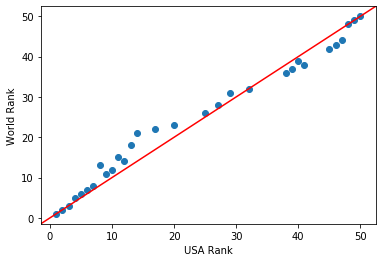

In [8]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)


plt.scatter(x=merged['rank_x'], y=merged['rank_y'])
plt.ylabel('World Rank')
plt.xlabel('USA Rank')
plt.show

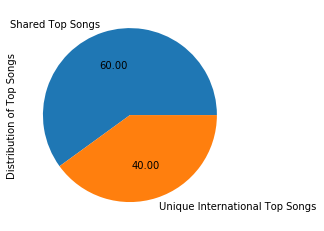

In [9]:
world_pie = pd.Series([merged.shape[0],(world_data.shape[0]-merged.shape[0])], index = ['Shared Top Songs', 'Unique International Top Songs'], name = 'Distribution of Top Songs')
world_pie.plot(kind='pie', autopct='%.2f')

In [10]:
total_data = usa_data.append(world_data)

In [11]:
y = total_data.popularity
X = total_data.drop(['popularity', 'title', 'artist', 'top genre'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=1, test_size=.5)

In [13]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [14]:
world_in_usa = model.predict(X_test)

In [15]:
world_in_usa_model = lr.fit(X_train, y_train)

In [16]:
pd.DataFrame({'Actual': y_test, 'Predicted': world_in_usa})

,Actual,Predicted
30,85,82.411789
34,84,81.508077
33,84,83.143417
31,84,82.704302
43,76,78.143272
17,89,92.457607
36,84,80.868950
32,84,84.178133
19,91,88.242180
15,93,90.526961


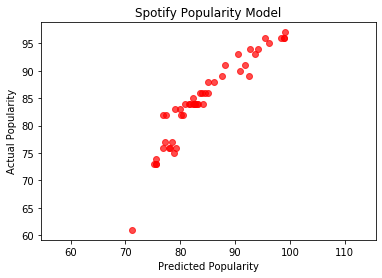

In [17]:
usa_popularity_train = y_test
plt.scatter(world_in_usa, usa_popularity_train, alpha=.7,
            color='r')
plt.xlabel('Predicted Popularity')
plt.ylabel('Actual Popularity')
plt.title('Spotify Popularity Model')
plt.axis('equal')
plt.show()

In [18]:
print(world_in_usa_model.score(X_test, y_test))

0.8748135547842467


In [19]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, world_in_usa)**0.5)

RMSE is: 
 2.691093788992357
